# NSQ Basic Stock Tradin Algo (MA)


## AAPL Stock Price

In [31]:
import pandas as pd
import importlib
import aFunctions
importlib.reload(aFunctions)

from aFunctions import *

In [32]:
df = pd.read_csv("data/AAPL.csv")
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        2516 non-null   object
 1   Close/Last  2516 non-null   object
 2   Volume      2516 non-null   int64 
 3   Open        2516 non-null   object
 4   High        2516 non-null   object
 5   Low         2516 non-null   object
dtypes: int64(1), object(5)
memory usage: 118.1+ KB


,Date,Close/Last,Volume,Open,High,Low
0,02/14/2025,$244.60,40896230,$241.25,$245.55,$240.99
1,02/13/2025,$241.53,53614050,$236.91,$242.3399,$235.57
2,02/12/2025,$236.87,45243290,$231.20,$236.96,$230.68
3,02/11/2025,$232.62,53718360,$228.20,$235.23,$228.13
4,02/10/2025,$227.65,33115650,$229.57,$230.585,$227.20
...,...,...,...,...,...,...
2511,02/23/2015,$33.25,292357000,$32.505,$33.25,$32.415
2512,02/20/2015,$32.3738,195513640,$32.155,$32.375,$32.0125
2513,02/19/2015,$32.1125,149181840,$32.12,$32.2575,$32.0825
2514,02/18/2015,$32.1788,178783920,$31.9063,$32.195,$31.8625


In [33]:
# Set col name
df.rename(columns={"Close/Last": "Close"}, inplace=True)

# Convert Data type
df["Date"] = pd.to_datetime(df["Date"])

# Use regex to replace $ before convert
df["Close"] = pd.to_numeric(df["Close"].replace(r'[\$,]', '', regex=True))
df["Open"] = pd.to_numeric(df["Open"].replace(r'[\$,]', '', regex=True))
df["High"] = pd.to_numeric(df["High"].replace(r'[\$,]', '', regex=True))
df["Low"] = pd.to_numeric(df["Low"].replace(r'[\$,]', '', regex=True))

df.sort_values(by="Date", ascending=True).reset_index(drop=True)

,Date,Close,Volume,Open,High,Low
0,2015-02-17,31.9575,252056440,31.8725,32.2200,31.7300
1,2015-02-18,32.1788,178783920,31.9063,32.1950,31.8625
2,2015-02-19,32.1125,149181840,32.1200,32.2575,32.0825
3,2015-02-20,32.3738,195513640,32.1550,32.3750,32.0125
4,2015-02-23,33.2500,292357000,32.5050,33.2500,32.4150
...,...,...,...,...,...,...
2511,2025-02-10,227.6500,33115650,229.5700,230.5850,227.2000
2512,2025-02-11,232.6200,53718360,228.2000,235.2300,228.1300
2513,2025-02-12,236.8700,45243290,231.2000,236.9600,230.6800
2514,2025-02-13,241.5300,53614050,236.9100,242.3399,235.5700


In [34]:
# df.info()
df.describe(include=[int, float]) # View Data Summary

,Close,Volume,Open,High,Low
count,2516.000000,2.516000e+03,2516.000000,2516.000000,2516.000000
mean,98.817013,1.144962e+08,98.723873,99.780063,97.744573
std,66.519845,6.626268e+07,66.437211,67.135674,65.805458
min,22.585000,2.323471e+07,22.500000,22.917500,22.367500
25%,38.476875,7.003828e+07,38.498125,38.709925,38.185625
50%,71.087500,9.826530e+07,70.563750,71.596250,69.883750
75%,155.447500,1.391778e+08,155.157500,157.342500,153.495000
max,259.020000,6.475300e+08,258.190000,260.100000,257.630000


In [35]:
df.isnull().sum()

Date      0
Close     0
Volume    0
Open      0
High      0
Low       0
dtype: int64

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
df_matrix = df.corr()

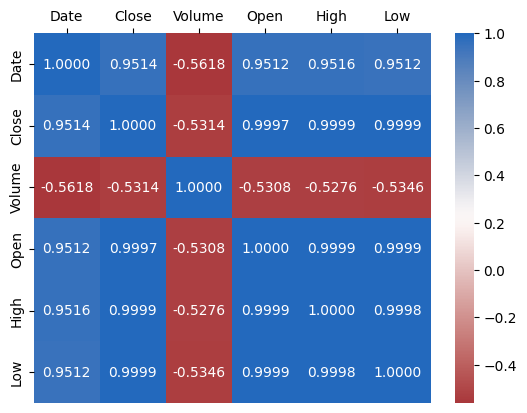

In [38]:
cmap = sns.cm.vlag_r
ax = sns.heatmap(df_matrix, 
            annot=True, 
            cmap=cmap, 
            fmt=".4f")
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
plt.show()

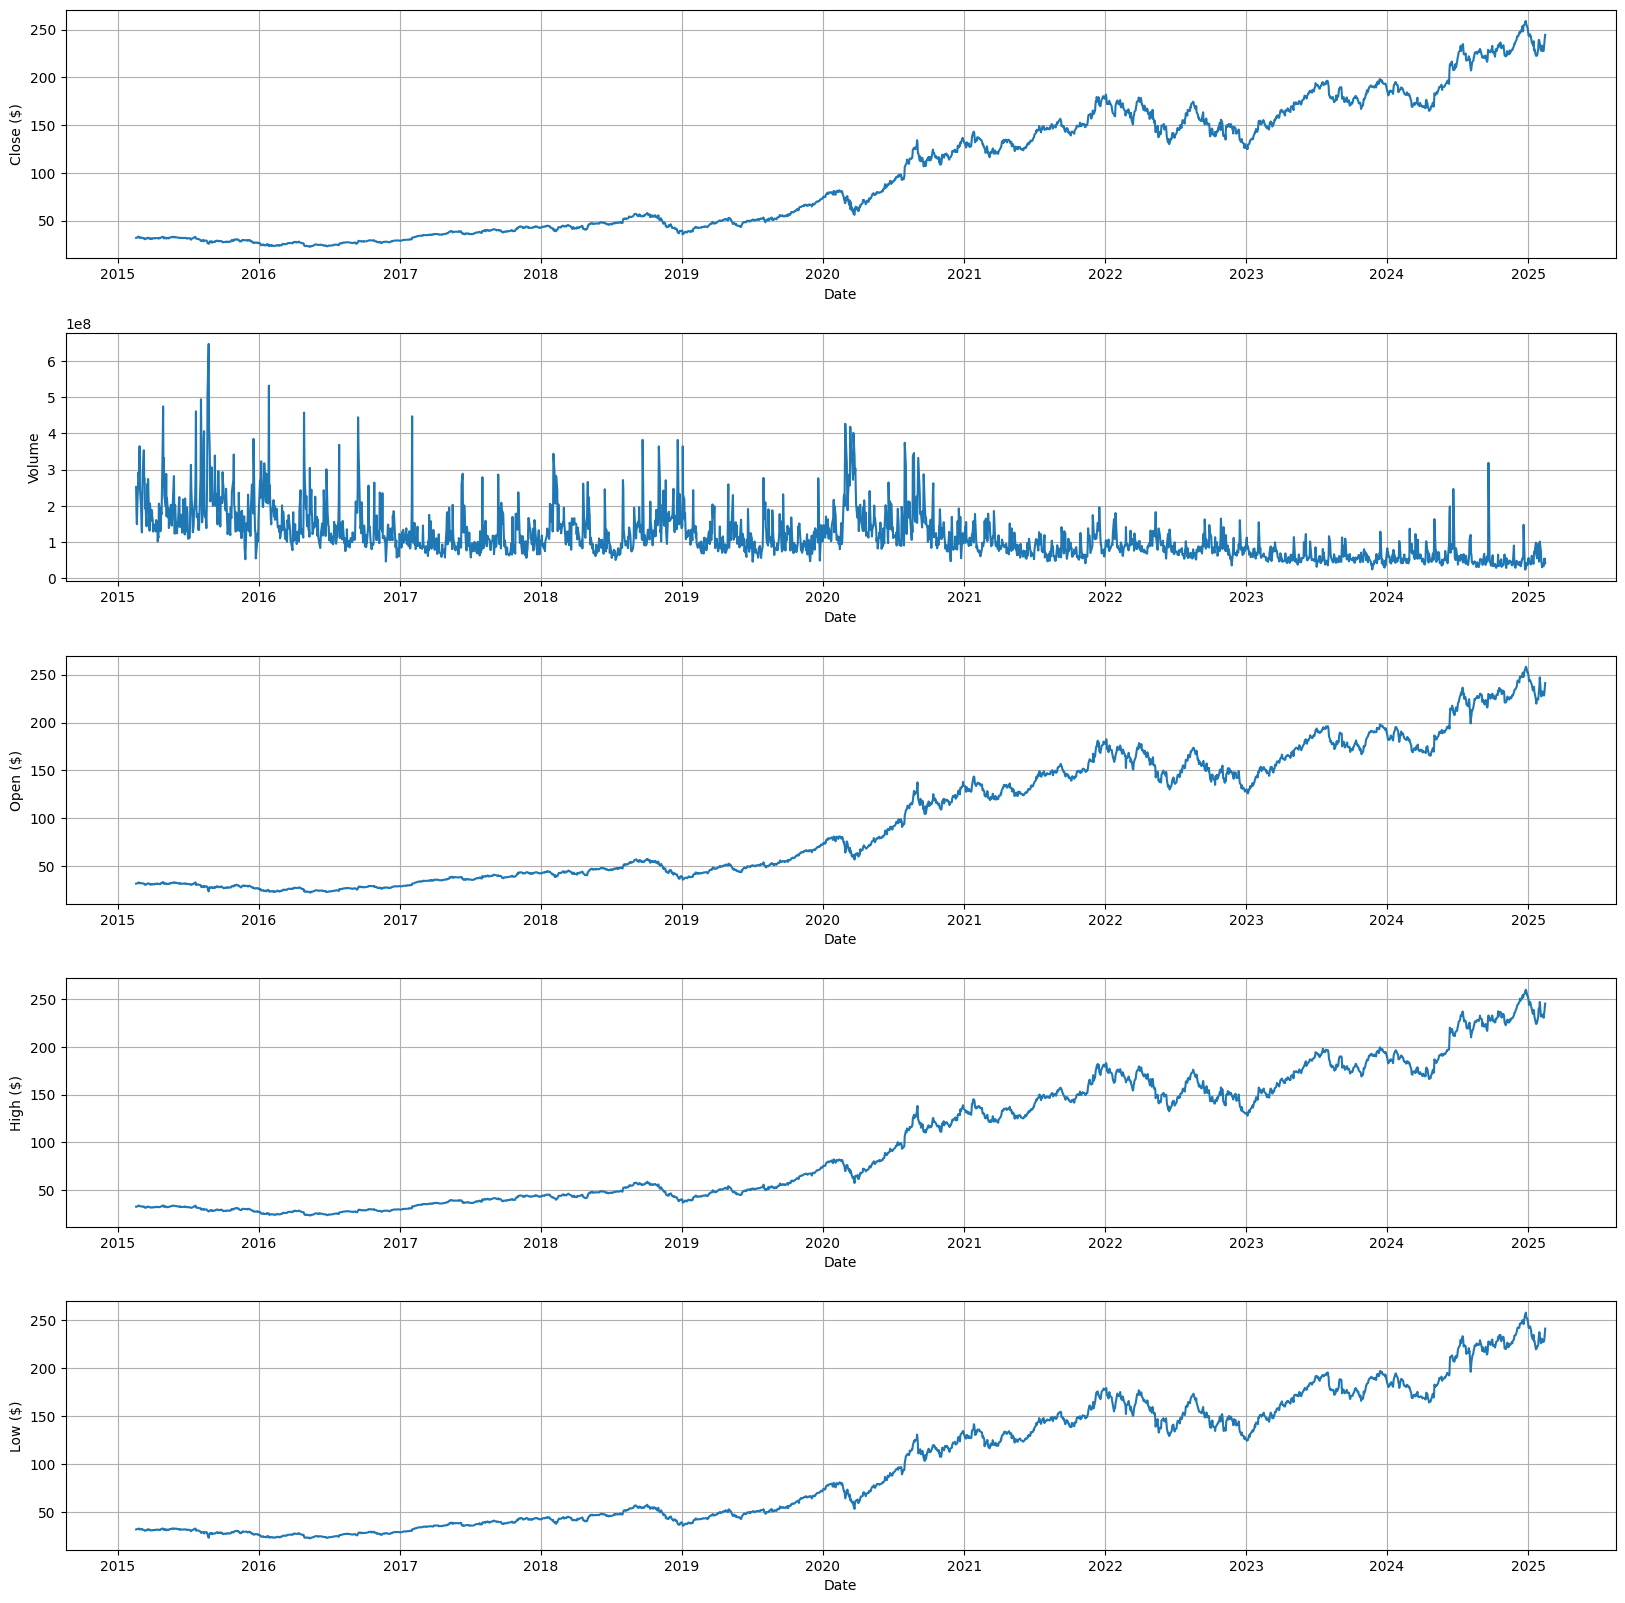

In [39]:
plt.figure(figsize=(20, 20))

plt.subplot(5, 1, 1)
plt.plot(df["Date"], df["Close"])
plt.xlabel(xlabel="Date")
plt.ylabel(ylabel="Close ($)")
plt.grid()

plt.subplot(5, 1, 2)
plt.plot(df["Date"], df["Volume"])
plt.xlabel(xlabel="Date")
plt.ylabel(ylabel="Volume")
plt.grid()

plt.subplot(5, 1, 3)
plt.plot(df["Date"], df["Open"])
plt.xlabel(xlabel="Date")
plt.ylabel(ylabel="Open ($)")
plt.grid()

plt.subplot(5, 1, 4)
plt.plot(df["Date"], df["High"])
plt.xlabel(xlabel="Date")
plt.ylabel(ylabel="High ($)")
plt.grid()

plt.subplot(5, 1, 5)
plt.plot(df["Date"], df["Low"])
plt.xlabel(xlabel="Date")
plt.ylabel(ylabel="Low ($)")
plt.grid()

plt.subplots_adjust(hspace=.3)

plt.show()

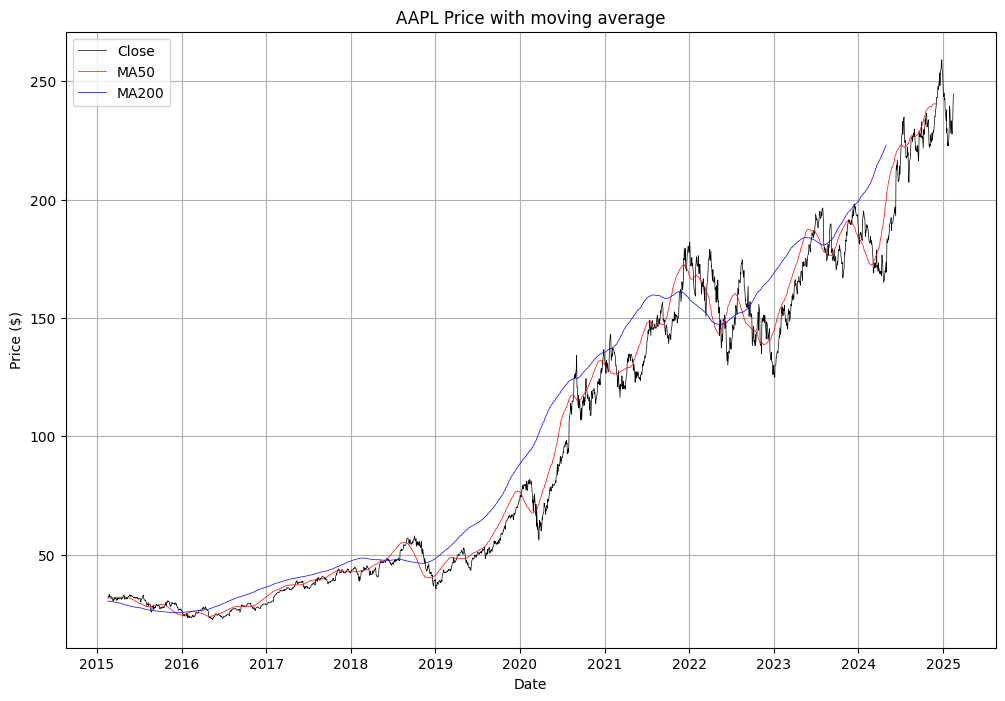

In [40]:
df["MA50"] = df["Close"].rolling(window=50).mean()
df["MA200"] = df["Close"].rolling(window=200).mean()

plt.figure(figsize=(12, 8))

plt.plot(df["Date"], df["Close"], color="Black", alpha=1, label="Close", linewidth=0.5)
plt.plot(df["Date"], df["MA50"], color="red", alpha=1, label="MA50", linewidth=0.5)
plt.plot(df["Date"], df["MA200"], color="blue", alpha=1, label="MA200", linewidth=0.5)

plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.title("AAPL Price with moving average")
plt.legend()
plt.grid()

plt.show()

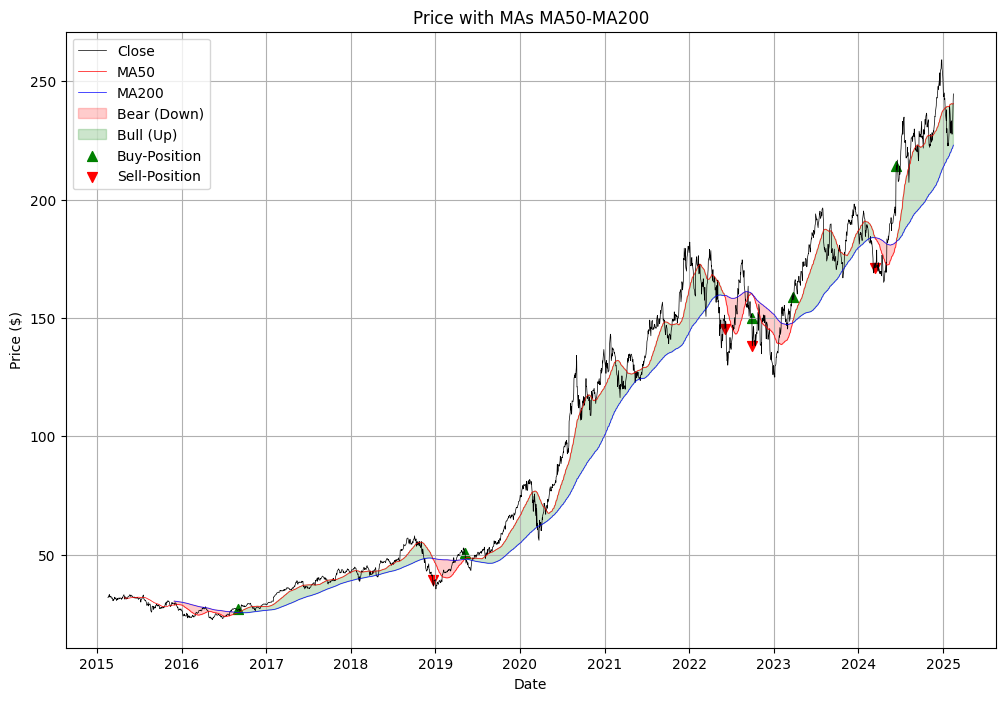

In [41]:
df = prepData(pd.read_csv("data/AAPL.csv"))
generateMASignalGraph(df=df)

In [42]:
df

,Date,Close,Volume,Open,High,Low
0,2015-02-17,31.9575,252056440,31.8725,32.2200,31.7300
1,2015-02-18,32.1788,178783920,31.9063,32.1950,31.8625
2,2015-02-19,32.1125,149181840,32.1200,32.2575,32.0825
3,2015-02-20,32.3738,195513640,32.1550,32.3750,32.0125
4,2015-02-23,33.2500,292357000,32.5050,33.2500,32.4150
...,...,...,...,...,...,...
2511,2025-02-10,227.6500,33115650,229.5700,230.5850,227.2000
2512,2025-02-11,232.6200,53718360,228.2000,235.2300,228.1300
2513,2025-02-12,236.8700,45243290,231.2000,236.9600,230.6800
2514,2025-02-13,241.5300,53614050,236.9100,242.3399,235.5700


## Back test the strategy

In [43]:
df_AAPL = prepData(pd.read_csv("data/AAPL.csv"))
df_AAPL

,Date,Close,Volume,Open,High,Low
0,2015-02-17,31.9575,252056440,31.8725,32.2200,31.7300
1,2015-02-18,32.1788,178783920,31.9063,32.1950,31.8625
2,2015-02-19,32.1125,149181840,32.1200,32.2575,32.0825
3,2015-02-20,32.3738,195513640,32.1550,32.3750,32.0125
4,2015-02-23,33.2500,292357000,32.5050,33.2500,32.4150
...,...,...,...,...,...,...
2511,2025-02-10,227.6500,33115650,229.5700,230.5850,227.2000
2512,2025-02-11,232.6200,53718360,228.2000,235.2300,228.1300
2513,2025-02-12,236.8700,45243290,231.2000,236.9600,230.6800
2514,2025-02-13,241.5300,53614050,236.9100,242.3399,235.5700


In [44]:
# print test log result
test_log = strategyTest(df=df_AAPL, fast=5, slow=100)
test_log

,Order_Date,Action,Balance $,Share,Share Price,Net
0,2015-02-16,Init,100.00,0.00,31.8725,100.00
1,2015-07-20,BUY,0.00,3.05,32.7425,99.86
2,2015-07-27,SELL,93.86,0.00,30.7725,93.86
3,2015-10-30,BUY,0.00,3.10,30.2475,93.77
4,2015-11-13,SELL,89.28,0.00,28.8000,89.28
5,2015-11-20,BUY,0.00,3.00,29.8000,89.40
6,2015-12-15,SELL,83.95,0.00,27.9850,83.95
7,2016-03-23,BUY,0.00,3.15,26.6200,83.85
8,2016-04-28,SELL,76.87,0.00,24.4025,76.87
9,2016-07-29,BUY,0.00,2.95,26.0475,76.84


In [45]:
# try extract result
test_log.iloc[-1]
# print(test_log.iloc[-1]["Net"])

Order_Date     2025-02-14 00:00:00
Action                       Final
Balance $                      0.0
Share                         2.18
Share Price                 241.25
Net                         525.93
Name: 54, dtype: object

## Back test multiple Parameters

In [46]:
# stores record in dataframe
# fast - slow - result
# fast start 0 end 100
# slow start 10 end 500

In [47]:
df = prepData(pd.read_csv("data/AAPL.csv"))
test_log = strategyTest(df=df, slow=100, fast=5)
test_log

,Order_Date,Action,Balance $,Share,Share Price,Net
0,2015-02-16,Init,100.00,0.00,31.8725,100.00
1,2015-07-20,BUY,0.00,3.05,32.7425,99.86
2,2015-07-27,SELL,93.86,0.00,30.7725,93.86
3,2015-10-30,BUY,0.00,3.10,30.2475,93.77
4,2015-11-13,SELL,89.28,0.00,28.8000,89.28
5,2015-11-20,BUY,0.00,3.00,29.8000,89.40
6,2015-12-15,SELL,83.95,0.00,27.9850,83.95
7,2016-03-23,BUY,0.00,3.15,26.6200,83.85
8,2016-04-28,SELL,76.87,0.00,24.4025,76.87
9,2016-07-29,BUY,0.00,2.95,26.0475,76.84


In [48]:
# Available function
# prepData()
# generateMASignal()
# testStrategy()

import warnings
from pandas.errors import PerformanceWarning

warnings.simplefilter(action='ignore', category=PerformanceWarning)

df = prepData(pd.read_csv("data/AAPL.csv"))

records = []
fasts = list(range(5, 101, 5))
slows = list(range(100, 501, 50))

# print(strategyTest(df=df, slow=5, fast=100))

for fast in fasts:
    result = []  # Reset log

    for slow in slows:
        # print(f"fast: {fast}, slow: {slow}")
        
        result = strategyTest(df=df, slow=slow, fast=fast)

        # Calculation
        init_investment = result.iloc[0]["Balance $"]
        final_value = result.iloc[-1]["Net"]
        pct_change = (final_value - init_investment) / init_investment * 100
        net = result.iloc[-1]["Net"]
        exe_order = len(result) - 2
        # print(init_investment)
        # print(final_value)
        # print(result)

        # Store data in a list
        records.append([fast, slow, net, pct_change, exe_order])

# Convert the list to a DataFrame once (efficient)
test_log = pd.DataFrame(records, columns=["Fast", "Slow", "Net", "Result%", "#Order"])

# Make this function
        


In [49]:
# len(test_log)
test_log

,Fast,Slow,Net,Result%,#Order
0,5,100,525.93,425.93,53
1,5,150,461.22,361.22,47
2,5,200,511.17,411.17,27
3,5,250,586.02,486.02,15
4,5,300,473.58,373.58,17
...,...,...,...,...,...
175,100,300,556.90,456.90,7
176,100,350,525.25,425.25,5
177,100,400,511.29,411.29,7
178,100,450,463.65,363.65,5


In [50]:
# to top performer 
test_log.nlargest(5, "Result%")

,Fast,Slow,Net,Result%,#Order
149,85,350,610.21,510.21,5
3,5,250,586.02,486.02,15
175,100,300,556.90,456.90,7
166,95,300,537.21,437.21,7
11,10,200,530.65,430.65,13


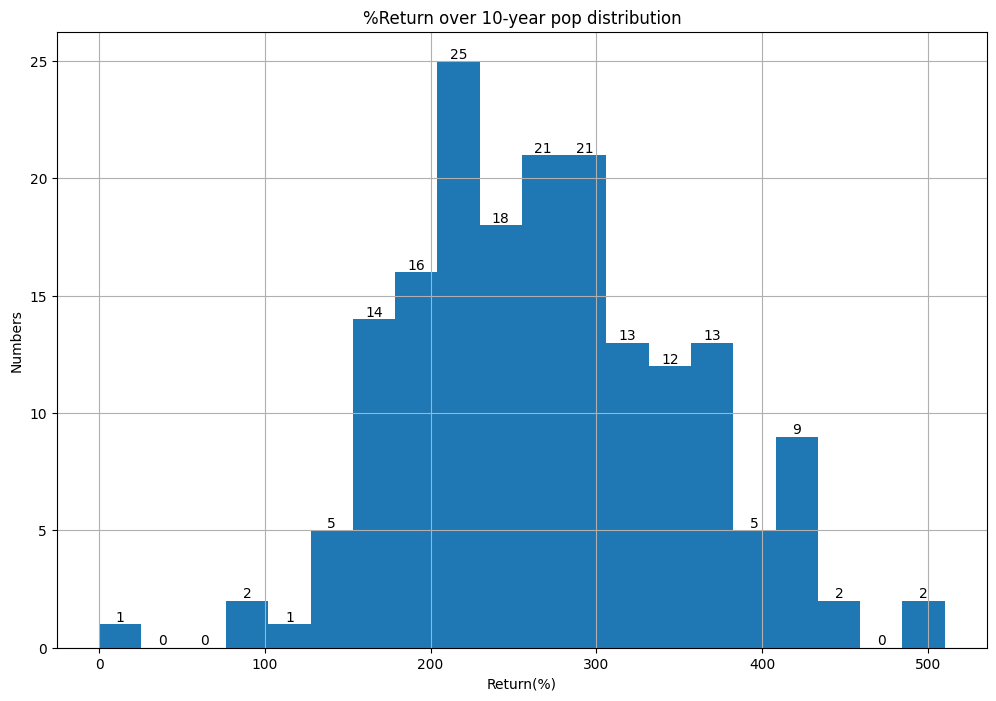

In [51]:
plt.figure(figsize=(12,8))

counts, bins, bars = plt.hist(test_log["Result%"], bins=20)
plt.xlabel(xlabel="Return(%)")
plt.ylabel(ylabel="Numbers")
plt.title("%Return over 10-year pop distribution")
plt.bar_label(bars)

plt.grid()

plt.show()


In [52]:
# store top performer in list
top_performers = test_log.nlargest(18, "Result%")
top_performers

,Fast,Slow,Net,Result%,#Order
149,85,350,610.21,510.21,5
3,5,250,586.02,486.02,15
175,100,300,556.90,456.90,7
166,95,300,537.21,437.21,7
11,10,200,530.65,430.65,13
101,60,200,526.27,426.27,7
0,5,100,525.93,425.93,53
176,100,350,525.25,425.25,5
157,90,300,523.84,423.84,7
140,80,350,520.88,420.88,5


## Test with other data

In [53]:
import warnings
from pandas.errors import PerformanceWarning
warnings.simplefilter(action='ignore', category=PerformanceWarning)

In [54]:
# read files
AAPL = prepData(pd.read_csv("data/AAPL.csv")) # for reference
AMZN = prepData(pd.read_csv("data/AMZN.csv"))
MSFT = prepData(pd.read_csv("data/MSFT.csv"))
NVDA = prepData(pd.read_csv("data/NVDA.csv"))
TSLA = prepData(pd.read_csv("data/TSLA.csv"))

In [55]:
AAPL

,Date,Close,Volume,Open,High,Low
0,2015-02-17,31.9575,252056440,31.8725,32.2200,31.7300
1,2015-02-18,32.1788,178783920,31.9063,32.1950,31.8625
2,2015-02-19,32.1125,149181840,32.1200,32.2575,32.0825
3,2015-02-20,32.3738,195513640,32.1550,32.3750,32.0125
4,2015-02-23,33.2500,292357000,32.5050,33.2500,32.4150
...,...,...,...,...,...,...
2511,2025-02-10,227.6500,33115650,229.5700,230.5850,227.2000
2512,2025-02-11,232.6200,53718360,228.2000,235.2300,228.1300
2513,2025-02-12,236.8700,45243290,231.2000,236.9600,230.6800
2514,2025-02-13,241.5300,53614050,236.9100,242.3399,235.5700


In [57]:
AAPL_df = multipleParaStrategyTest(AAPL)
AMZN_df = multipleParaStrategyTest(AMZN)
MSFT_df = multipleParaStrategyTest(MSFT)
NVDA_df = multipleParaStrategyTest(NVDA)
TSLA_df = multipleParaStrategyTest(TSLA)
# print("AAPL\n", AAPL_df)
# print("AMZN\n", AMZN_df)
# print("MSFT\n", MSFT_df)
# print("NVDA\n", NVDA_df)
# print("TSLA\n", TSLA_df)

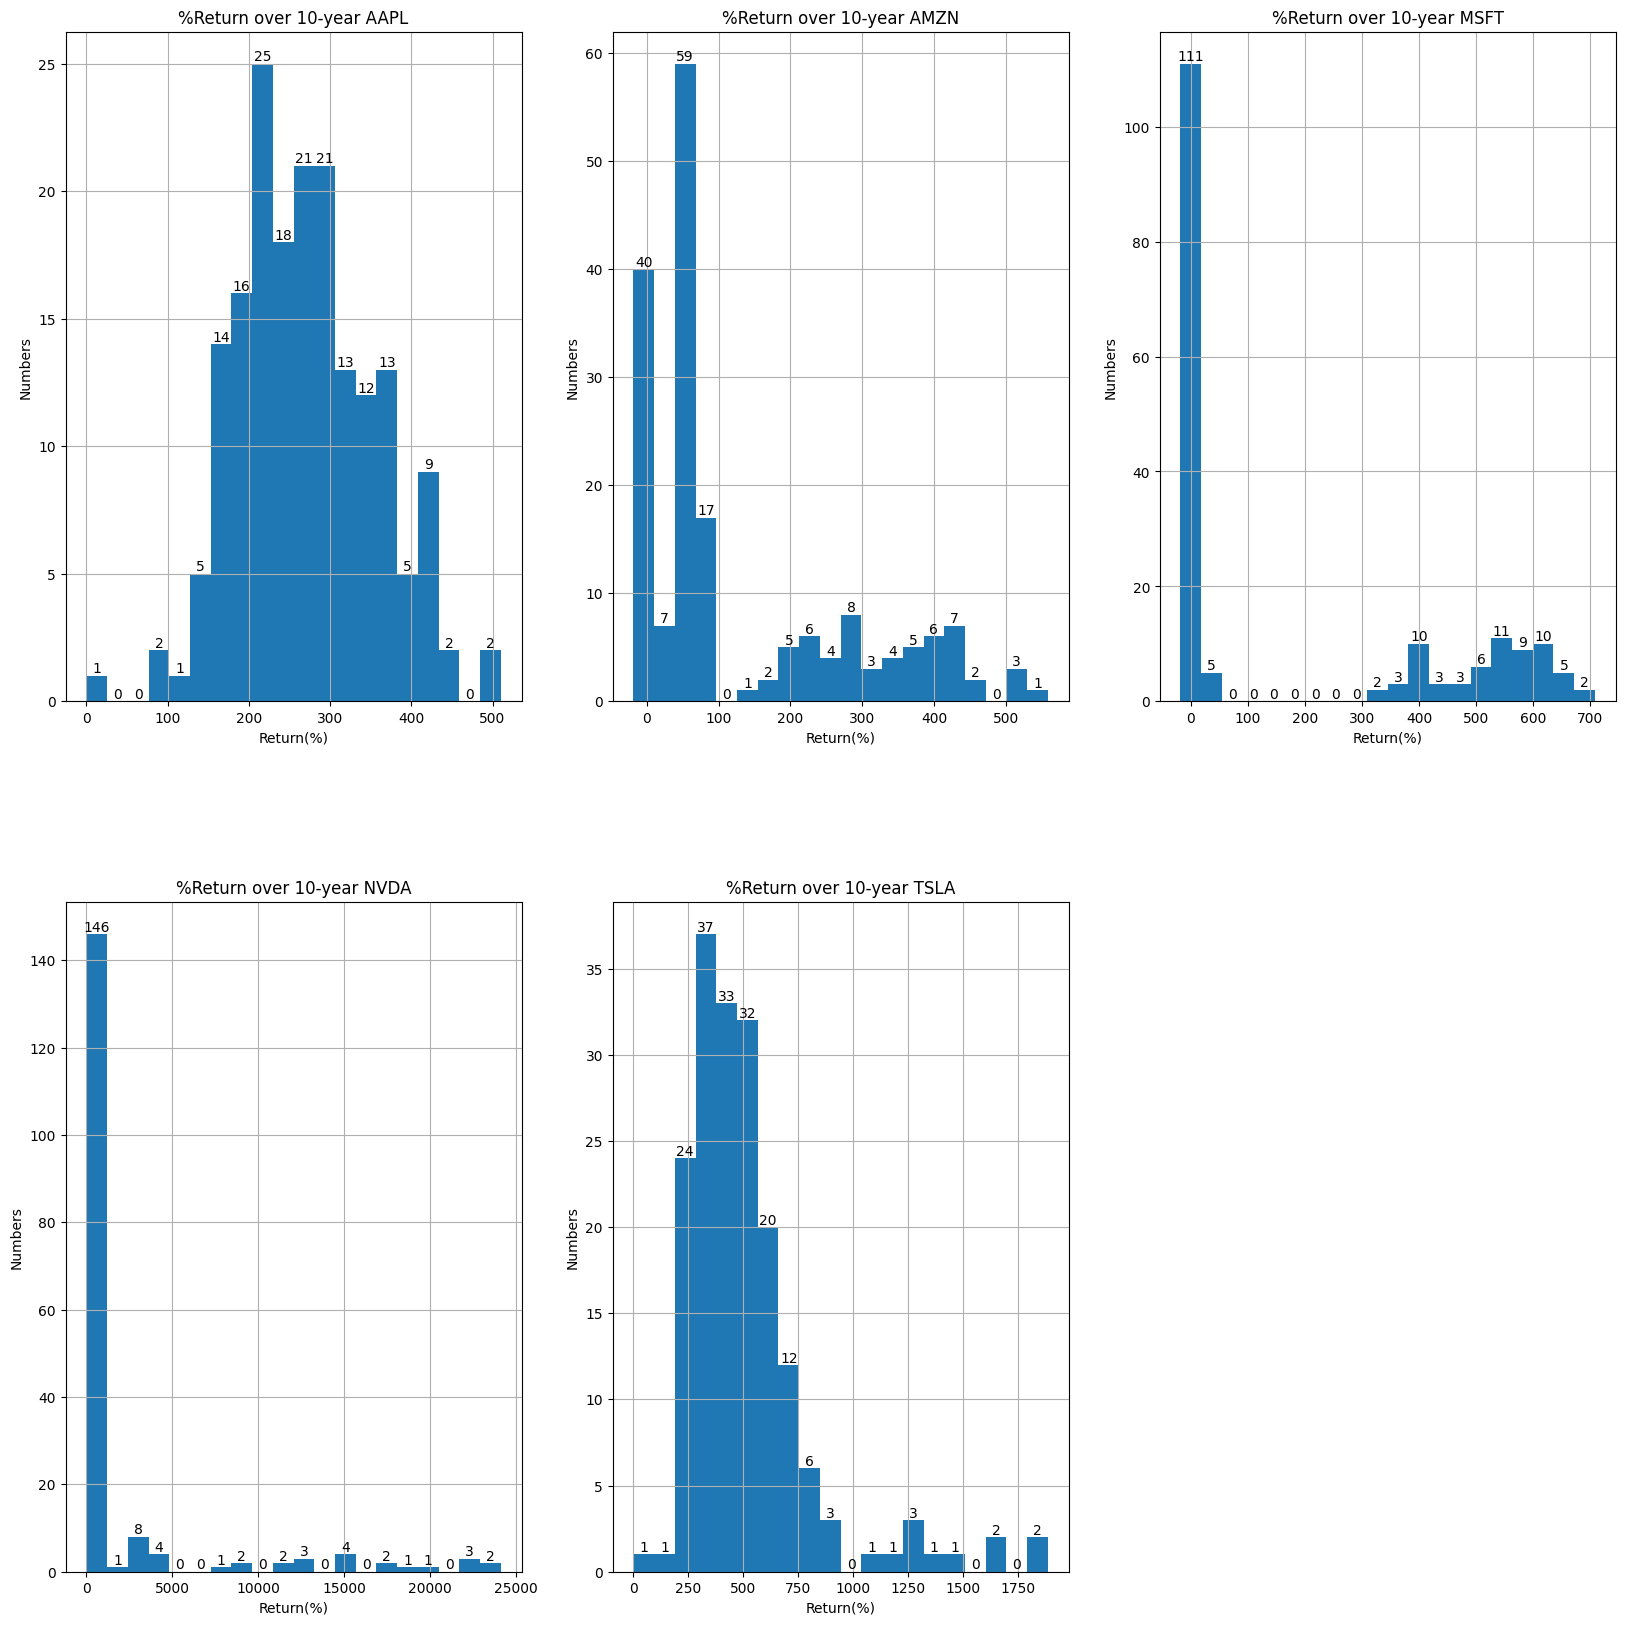

In [58]:
plt.figure(figsize=(20, 20))

plt.subplot(2, 3, 1)
counts, bins, bars = plt.hist(AAPL_df["Result%"], bins=20)
plt.xlabel(xlabel="Return(%)")
plt.ylabel(ylabel="Numbers")
plt.title("%Return over 10-year AAPL")
plt.bar_label(bars)
plt.grid()

plt.subplot(2, 3, 2)
counts, bins, bars = plt.hist(AMZN_df["Result%"], bins=20)
plt.xlabel(xlabel="Return(%)")
plt.ylabel(ylabel="Numbers")
plt.title("%Return over 10-year AMZN")
plt.bar_label(bars)
plt.grid()

plt.subplot(2, 3, 3)
counts, bins, bars = plt.hist(MSFT_df["Result%"], bins=20)
plt.xlabel(xlabel="Return(%)")
plt.ylabel(ylabel="Numbers")
plt.title("%Return over 10-year MSFT")
plt.bar_label(bars)
plt.grid()

plt.subplot(2, 3, 4)
counts, bins, bars = plt.hist(NVDA_df["Result%"], bins=20)
plt.xlabel(xlabel="Return(%)")
plt.ylabel(ylabel="Numbers")
plt.title("%Return over 10-year NVDA")
plt.bar_label(bars)
plt.grid()

plt.subplot(2, 3, 5)
counts, bins, bars = plt.hist(TSLA_df["Result%"], bins=20)
plt.xlabel(xlabel="Return(%)")
plt.ylabel(ylabel="Numbers")
plt.title("%Return over 10-year TSLA")
plt.bar_label(bars)
plt.grid()

plt.subplots_adjust(hspace=.3)

plt.show()

In [75]:
print("AAPL")
display(AAPL_df.nlargest(18, "Result%"))
print(42 * "=")
print("AMZN")
display(AMZN_df.nlargest(18, "Result%"))
print("MSFT")
display(MSFT_df.nlargest(18, "Result%"))
print("NVDA")
display(NVDA_df.nlargest(18, "Result%"))
print("TSLA")
display(TSLA_df.nlargest(18, "Result%"))

AAPL


,Fast,Slow,Net,Result%,#Order
149,85,350,610.21,510.21,5
3,5,250,586.02,486.02,15
175,100,300,556.90,456.90,7
166,95,300,537.21,437.21,7
11,10,200,530.65,430.65,13
101,60,200,526.27,426.27,7
0,5,100,525.93,425.93,53
176,100,350,525.25,425.25,5
157,90,300,523.84,423.84,7
140,80,350,520.88,420.88,5


AMZN


,Fast,Slow,Net,Result%,#Order
29,20,200,658.71,558.71,15
20,15,200,629.05,529.05,15
46,30,150,628.66,528.66,17
38,25,200,619.44,519.44,11
2,5,200,564.76,464.76,27
37,25,150,560.60,460.60,19
1,5,150,540.43,440.43,41
28,20,150,540.07,440.07,21
136,80,150,540.05,440.05,15
100,60,150,539.11,439.11,19


MSFT


,Fast,Slow,Net,Result%,#Order
4,5,300,808.21,708.21,4
47,30,200,786.05,686.05,8
46,30,150,769.50,669.50,10
154,90,150,740.54,640.54,7
110,65,200,739.14,639.14,7
56,35,200,737.05,637.05,8
119,70,200,736.54,636.54,7
38,25,200,728.64,628.64,12
21,15,250,724.83,624.83,10
74,45,200,723.80,623.80,7


NVDA


,Fast,Slow,Net,Result%,#Order
135,80,100,24230.96,24130.96,27
126,75,100,23292.21,23192.21,23
108,65,100,22625.93,22525.93,19
144,85,100,22574.25,22474.25,25
99,60,100,22422.05,22322.05,22
153,90,100,19940.34,19840.34,27
90,55,100,18759.74,18659.74,20
72,45,100,17931.45,17831.45,20
81,50,100,17682.72,17582.72,20
117,70,100,15720.82,15620.82,21


TSLA


,Fast,Slow,Net,Result%,#Order
81,50,100,1987.52,1887.52,27
154,90,150,1921.24,1821.24,23
145,85,150,1754.73,1654.73,19
90,55,100,1731.18,1631.18,27
127,75,150,1532.35,1432.35,19
109,65,150,1506.76,1406.76,17
118,70,150,1398.14,1298.14,17
117,70,100,1384.96,1284.96,25
136,80,150,1339.14,1239.14,19
163,95,150,1307.92,1207.92,19
